# 🏠 Predicting Real Estate: 0.75 R² 📊

### Overview
House price prediction involves analyzing various factors to estimate the selling price of residential properties. This process is crucial for both buyers and sellers to make informed decisions about real estate transactions.

### Dataset
The dataset used for house price prediction comprises numerous features, including the property's sale price, zoning classification, lot size, building type, overall quality, and other relevant attributes. These variables provide essential insights into property characteristics, which are instrumental in training predictive models.

### Objectives
1. Develop a predictive model that accurately estimates house prices based on property features.
2. Investigate the impact of different factors such as location, size, and condition on house sale prices.
3. Provide valuable insights to homeowners, real estate agents, and investors to facilitate better decision-making regarding property valuation.

### Methodology
1. **Data Collection and Preprocessing**: Gather comprehensive datasets and preprocess them by handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Feature Engineering**: Extract relevant features and potentially create new ones to enhance the predictive power of the model.
3. **Model Selection**: Explore various machine learning algorithms, including regression and ensemble methods, to identify the optimal model for house price prediction.
4. **Model Training and Evaluation**: Train the selected model on the preprocessed dataset and evaluate its performance using appropriate metrics such as mean absolute error and root mean squared error.
5. **Prediction and Interpretation**: Utilize the trained model to predict house prices for new data instances and interpret the results to gain insights into the underlying factors influencing property values.

### Libraries

In [3]:
# !pip install dash

In [4]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import HTML
import dash
from dash import html, dcc, Input, Output, State

# Data Transformation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

# Feature Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Pipeline
from sklearn.pipeline import Pipeline
import joblib

# Metrics
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.metrics import r2_score

# Regression Algorithms
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

/kaggle/input/real-estate-price-prediction/Real estate.csv


### Project Structure

1. [**Loading Data**](#first): Load the dataset from a file or source into a DataFrame for analysis.
2. [**Data Preprocessing**](#second): Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.
3. [**Exploratory Data Analysis (EDA)**](#third): Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.
4. [**Feature Engineering**](#fifth): Create new features or transform existing ones to improve the predictive power of the model.
5. [**Data Splitting**](#sixth): Split the training dataset into features (x) and the target variable (y) to prepare for model training.
6. [**Model Training**](#seventh): Utilize machine learning algorithms to train a predictive model on the training data.
7. [**Model Evaluation**](#eighth): Evaluate the trained model's performance using appropriate metrics and techniques.
8. [**Model Tuning**](#nine): Optimize model hyperparameters or configurations to improve performance.
9. [**Dash App Visualization**](#ten): Develop a user-friendly interface using Dash to visualize model predictions.



# <a id='first'></a> Loading Data

In [5]:
# Path to the CSV data file
DATAPATH = '/kaggle/input/real-estate-price-prediction/Real estate.csv'

# # Reading data from the CSV file into a DataFrame using the first column as the index
df = pd.read_csv(DATAPATH) 

# Dropping personalized feature
df = df.drop(columns=['No'])  

# Displaying the first few rows of the DataFrame
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:

# Convert the column to a categorical type with ordered=True
df['X1 transaction date'] = pd.Categorical(df['X1 transaction date'], ordered=True)

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode the categorical column
df['X1 transaction date'] = encoder.fit_transform(df['X1 transaction date'])

In [7]:
# Initialize empty lists to store object and non-object columns
obj = []
ints = []

# Loop through DataFrame columns
for col in df.columns:
    # Check if column data type is object
    if df[col].dtype == 'object':
        # If object, append column name, unique values count, and count of missing values to 'obj' list
        obj.append((col, df[col].nunique(), df[col].isna().sum()))
    else:
        # If non-object, append column name, unique values count, and count of missing values to 'ints' list
        ints.append((col, df[col].nunique(), df[col].isna().sum(), df[col].skew()))

# Determine the maximum length of 'obj' and 'ints' lists
max_len = max(len(obj), len(ints))

# Extend 'obj' and 'ints' lists with empty tuples to match the maximum length
obj.extend([('', '', '')] * (max_len - len(obj)))
ints.extend([('', '', '', '')] * (max_len - len(ints)))

# Create a dictionary with keys representing column categories and values representing lists of corresponding data
data = {
    'Numeric_columns': [x[0] for x in ints],
    'int_cols_uniques': [x[1] for x in ints],
    'int_cols_missing': [x[2] for x in ints],
    'int_cols_skew': [x[3] for x in ints]
}

# Convert the dictionary into a pandas DataFrame
pd.DataFrame(data)




,Numeric_columns,int_cols_uniques,int_cols_missing,int_cols_skew
0,X1 transaction date,12,0,-0.150834
1,X2 house age,236,0,0.382926
2,X3 distance to the nearest MRT station,259,0,1.888757
3,X4 number of convenience stores,11,0,0.154607
4,X5 latitude,234,0,-0.438598
5,X6 longitude,232,0,-1.219591
6,Y house price of unit area,270,0,0.599853


Based on the provided dataset overview:

### Numeric Columns:
- **Transaction date**: Date of the property transaction. **12** unique values, **0** missing values.
- **House age**: Age of the property in years. **236** unique values, **0** missing values, skewness of **0.383**.
- **Distance to the nearest MRT station**: Proximity to the nearest Mass Rapid Transit station in meters, is a key factor considering convenience and accessibility. **259** unique values, **0** missing values, skewness of **1.888**.
- **Number of convenience stores**: Count of convenience stores in the vicinity, indicating the property’s accessibility to basic amenities. **11** unique values, **0** missing values, skewness of **0.154**.
- **Latitude**: Geographical coordinates of the property, reflecting its location. **234** unique values, **0** missing values, skewness of **-0.0438**.
- **Longitude**: Geographical coordinates of the property, reflecting its location. **232** unique values, **0** missing values, skewness of **-1.219**.
- **House price of unit area**: The target variable, represents the house price per unit area. **270** unique values, **0** missing values, skewness of **0.599**.

This overview provides a snapshot of the dataset's columns, including unique values, missing values, and skewness for the numeric columns.

In [8]:
# This line of code retrieves the shape of the DataFrame 'df'
shape = df.shape
print(shape)

(414, 7)


# <a id='second'></a> Data Preprocessing

In [9]:
# Latitude
mean_latitude = df['X5 latitude'].mean()

# Longitude
mean_longitude = df['X6 longitude'].mean()

# Creatin a map
mymap = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=12)

# Adding markers to latitude and longitude
for lat, lon in zip(df['X5 latitude'], df['X6 longitude']):
    folium.Marker([lat, lon]).add_to(mymap)

# Display the map directly in the notebook with specified width and height
HTML(mymap._repr_html_().replace('"', "'").replace("width:100%;", "width:800px;height:500px;"))


In [10]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


In [11]:
# Displaying the data types of each column in the DataFrame
df.dtypes

X1 transaction date                         int64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [12]:
# Calculate the sum of missing values for each column and reset the index, storing the result in a new DataFrame called 'isna'
isna = df.isna().sum().reset_index(name="missing_values")

# Calculate the percentage of missing values for each column and add it as a new column called 'percentage' in the 'isna' DataFrame
isna['percentage'] = round((isna['missing_values'] / df.shape[0]) * 100, 2)

# Sort the 'isna' DataFrame by the 'missing_values' column in descending order and display the top 35 rows
isna.sort_values(by='missing_values', ascending=False)


,index,missing_values,percentage
0,X1 transaction date,0,0.0
1,X2 house age,0,0.0
2,X3 distance to the nearest MRT station,0,0.0
3,X4 number of convenience stores,0,0.0
4,X5 latitude,0,0.0
5,X6 longitude,0,0.0
6,Y house price of unit area,0,0.0


In [13]:
# Counting the number of duplicated rows in the DataFrame and then counting
# the frequency of those counts to summarize the distribution of duplicated rows
df.duplicated().value_counts()


False    414
Name: count, dtype: int64

In [14]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Preprocessing the Column Names

In [15]:
df.columns = list(map(lambda x: '_'.join(x), df.columns.str.lower().str.split()))
df.head()

,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,3,32.0,84.87882,10,24.98298,121.54024,37.9
1,3,19.5,306.59470,9,24.98034,121.53951,42.2
2,11,13.3,561.98450,5,24.98746,121.54391,47.3
3,10,13.3,561.98450,5,24.98746,121.54391,54.8
4,2,5.0,390.56840,5,24.97937,121.54245,43.1


### Outliers and inconsistent data

### Z-score Plot for Numerical Columns

This code snippet generates a series of subplots to visualize the distribution of Z-scores for each numerical column in the dataset. Z-score, also known as standard score, measures how many standard deviations an observation is from the mean. 

#### Steps:
1. **Select Numerical Columns**: Only the numerical columns are selected from the dataset using `select_dtypes` function.

2. **Calculate Plot Layout**: The number of subplots, rows, and columns are calculated based on the number of numerical columns.

3. **Set Figure Size**: The size of the figure is adjusted based on the number of rows.

4. **Iterate Through Numerical Columns**: For each numerical column, a subplot is created. Z-scores are calculated for each column and plotted against the index. A threshold line is drawn at Z-score of 3 and -3 to indicate outliers.

#### Interpretation:
- Points above the red dashed line (Z-score > 3) or below the red dashed line (Z-score < -3) are considered outliers.
- This visualization helps in identifying potential outliers in the dataset for each numerical feature.



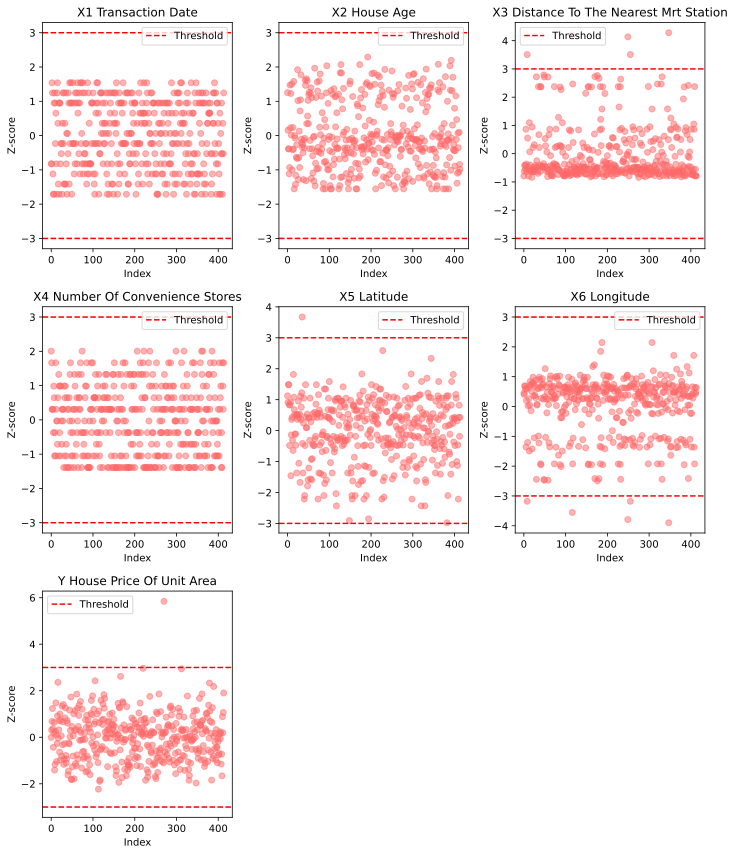

In [18]:
# Выберем только числовые столбцы
numerics = df.select_dtypes(include=np.number)

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))

for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)  
    z_scores = (numerics[col] - numerics[col].mean()) / numerics[col].std()

    threshold = 3

    plt.scatter(np.arange(len(z_scores)), z_scores, color='#FF6868', alpha=0.5)
    plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
    plt.axhline(y=-threshold, color='red', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Z-score')
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))}')
    plt.legend()

plt.tight_layout()
plt.show()

# <a id='third'></a> Exploratory Data Analysis

In [19]:
# Generate descriptive statistics for all numerical columns
df.describe()

,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,5.787440,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,3.383944,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,3.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,6.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,9.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,11.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Visualising features distributions and correlation

In [20]:
plt.figure(figsize=(10, 13))
sns.pairplot(df)
plt.title('Pairplot of Variables in DataFrame', fontsize=16) 
plt.xlabel('X Label', fontsize=12)  
plt.ylabel('Y Label', fontsize=12)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

<Figure size 1000x1300 with 0 Axes>

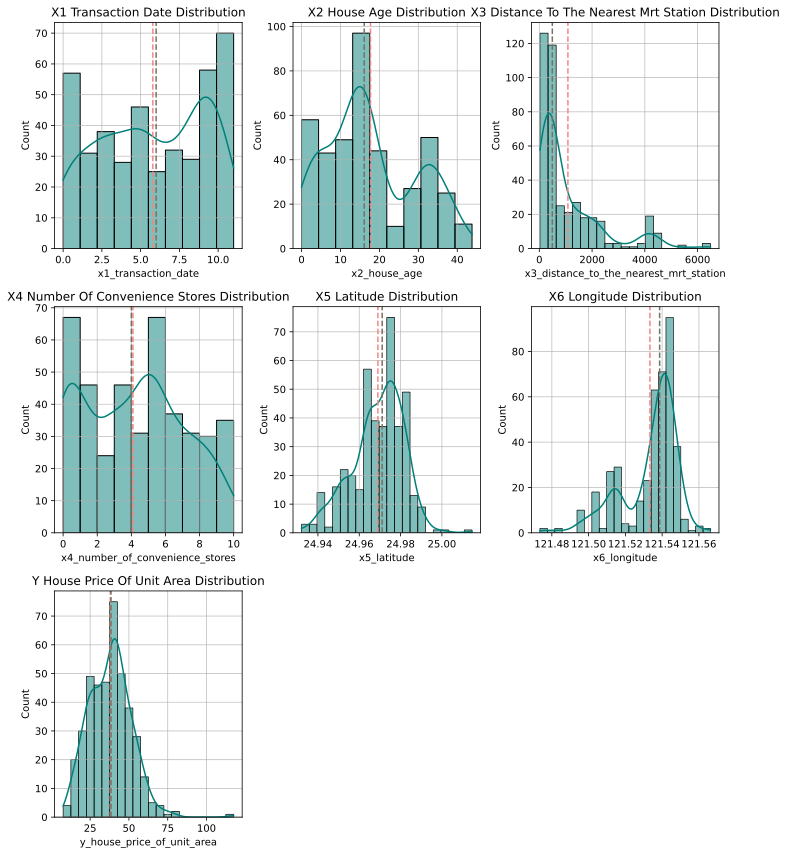

In [21]:
# Select numerical columns from the DataFrame
numerics = df.select_dtypes(include='number')

# Calculate the number of plots, rows, and columns for subplots
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Set the figure size based on the number of rows
plt.figure(figsize=(10, 4 * num_rows))

# Iterate over each numerical column and create a histogram subplot
for i, col in enumerate(numerics, 1):
    plt.subplot(num_rows, num_columns, i)  # Create subplot

    mean = numerics[col].mean()
    median = numerics[col].median()
    sns.histplot(numerics[col], kde=True, color='#007f79')  # Plot histogram using seaborn
    plt.axvline(x=mean, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median, color='#747264', linestyle='--', label='Median')
    plt.grid(True, alpha=0.8)  # Add grid lines to the plot
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Set title for the subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots


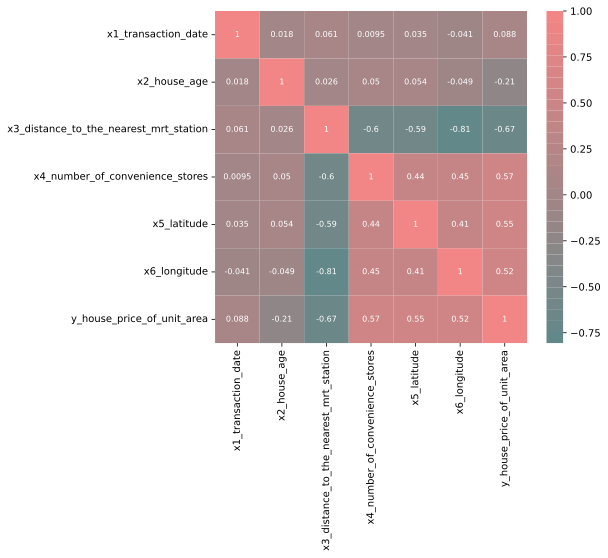

In [22]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(), annot=True,
            cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788', '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787',
                  '#948687', '#998687', '#9e8687', '#a38687', '#a88687', '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
                  '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585', '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'], annot_kws={"fontsize":8})
plt.show()


---

- **Increasing Convenience Stores and House Prices:**
  - There's a clear positive correlation between the presence of more convenience stores and higher house prices per unit area.


- **Distance to Nearest MRT Station and House Prices:**
  - There's an inverse relationship between the distance to the nearest MRT station and the average house price per unit area.
  - Particularly, there's a noticeable decline in prices as the distance increases.

---

*Note:* Utilizing latitude and longitude data is most effective when used together, suggesting the creation of a composite feature for geographical clusters. Additionally, incorporating an additional feature to link geographical location with distance to the nearest metro station could enhance the analysis.


# <a id='fifth'></a> Feature Engineering

### Log Transformation of Target Variable

In this code snippet, the feature is transformed using the natural logarithm plus one transformation (`np.log1p`). This transformation is commonly used to deal with skewed distributions and heteroscedasticity in regression analysis.

#### Log Transformation:
- The `np.log1p` function applies the natural logarithm transformation plus one to each value of the `'x3_distance_to_the_nearest_mrt_station'`.
- Adding one before taking the logarithm helps avoid errors when the original value is zero.

#### Benefits of Log Transformation:
- **Normalization**: Log transformation can help normalize the distribution of the target variable, making it more symmetric.
- **Homoscedasticity**: It can stabilize the variance of the target variable, making it more homoscedastic.
- **Linear Relationships**: Log-transformed variables often result in more linear relationships with predictor variables in regression models.

#### Considerations:
- Log transformation is suitable for variables with right-skewed or positively skewed distributions.
- However, it may not be appropriate for variables with zero or negative values.

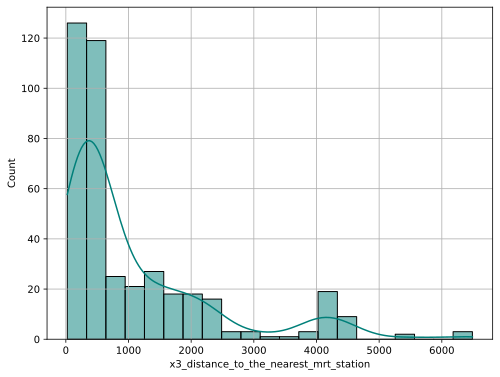

In [23]:
# Create a new figure with a specified size (8 inches width, 6 inches height)
plt.figure(figsize=(8, 6))

# Create a histogram plot of the target variable 'TARGET' using seaborn
sns.histplot(df['x3_distance_to_the_nearest_mrt_station'], kde=True, color='#007f79')

# Add grid lines to the plot
plt.grid(True)

# Display the plot
plt.show()

In [24]:
# Apply the natural logarithm transformation plus 1 to the 'x3_distance_to_the_nearest_mrt_station' feature
df['x3_distance_to_the_nearest_mrt_station'] = np.log1p(df['x3_distance_to_the_nearest_mrt_station'])

### Transforming `'x5_latitude'` and `'x6_longitude'`


Utilizing latitude and longitude data is most effective when used together, suggesting the creation of a composite feature for geographical clusters.

In [27]:



# Function to create cluster features
def create_cluster_features(df, num_clusters=10):
    # Combine latitude and longitude into one array
    X = df[['x5_latitude', 'x6_longitude']].values
    
    # Use KMeans clustering to create clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    df['cluster'] = kmeans.predict(X)
    
    # Encode cluster labels
    label_encoder = LabelEncoder()
    label_encoder.fit(df['cluster'])
    df['cluster'] = label_encoder.transform(df['cluster'])

    # Save models
    joblib.dump(kmeans, '/kaggle/working/kmeans_model.pkl')
    joblib.dump(label_encoder, '/kaggle/working/label_encoder.pkl')
    
    return df

# Applying transformations
df = create_cluster_features(df)

### Linking Geographical location with Distance to the nearest Metro Station.

Incorporating an additional feature to link geographical location with distance to the nearest metro station could enhance the analysis.

In [28]:

def create_store_density_features(df):
    store_density = df.groupby('cluster')['x3_distance_to_the_nearest_mrt_station'].mean().reset_index()
    df = pd.merge(df, store_density, on='cluster', suffixes=('', '_density'))
    return df

### Selecting and Validating the Model to predict the `cluster`

In [29]:

# Prepare the aggregated data
cluster_mean_distance = create_store_density_features(df)
X = cluster_mean_distance[['cluster', 'x3_distance_to_the_nearest_mrt_station']]
y = cluster_mean_distance['x3_distance_to_the_nearest_mrt_station_density']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=500, bootstrap=True, max_depth=7, random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
best_model = None
besr_r2 = float('-inf')
# Iterate over models
for name, model in models.items():
    # Fit the model
    if name != "SVR":
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train.values.ravel())
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate the R-squared
    r2 = r2_score(y_test, y_pred)
    if r2 > besr_r2:
        besr_r2 = r2
        best_model = model

    print(f"Model: {name}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("="*40)



Model: Linear Regression
Mean Squared Error: 0.25883367437041016
R-squared: 0.7009952091513608
Model: Decision Tree
Mean Squared Error: 0.004932383294506169
R-squared: 0.9943021083367669
Model: Random Forest
Mean Squared Error: 0.0028076893629657377
R-squared: 0.996756555835389
Model: KNN
Mean Squared Error: 0.01670275888211475
R-squared: 0.9807049645364347
Model: SVR
Mean Squared Error: 0.060857890610766574
R-squared: 0.929696934149609
Model: Gradient Boosting
Mean Squared Error: 0.003885715456939355
R-squared: 0.9955112195492895


### Training the Model and Saving for further Data Processing

In [30]:
# Prepare the aggregated data
cluster_distance = create_store_density_features(df)
X = cluster_distance[['cluster', 'x3_distance_to_the_nearest_mrt_station']]
y = cluster_distance['x3_distance_to_the_nearest_mrt_station_density']

# Fit the Random Forest model
cluster_model = best_model
cluster_model.fit(X, y)

# Save the model
joblib.dump(cluster_model, '/kaggle/working/cluster_model.pkl')

['/kaggle/working/cluster_model.pkl']

In [31]:
# Linking Geographical location with Distance to the nearest Metro Station
df = create_store_density_features(df)

In [32]:
df.head()

,x1_transaction_date,x2_house_age,x3_distance_to_the_nearest_mrt_station,x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area,cluster,x3_distance_to_the_nearest_mrt_station_density
0,3,32.0,4.452937,10,24.98298,121.54024,37.9,5,5.836474
1,3,19.5,5.728783,9,24.98034,121.53951,42.2,5,5.836474
2,11,13.3,6.333252,5,24.98746,121.54391,47.3,5,5.836474
3,10,13.3,6.333252,5,24.98746,121.54391,54.8,5,5.836474
4,2,5.0,5.970160,5,24.97937,121.54245,43.1,5,5.836474


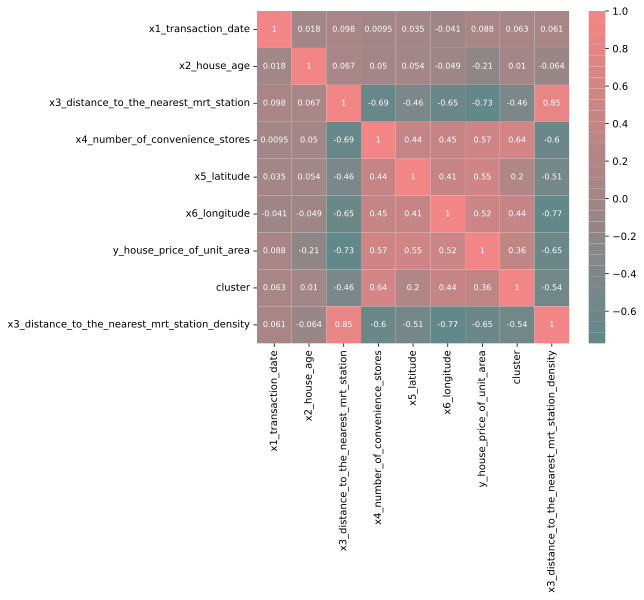

In [33]:
plt.figure(figsize=(7, 6))
sns.heatmap(df.corr(), annot=True,
            cmap=['#638889', '#678788', '#6c8788', '#718788', '#768788', '#7b8788', '#808788', '#858788', '#8a8787', '#8f8787',
                  '#948687', '#998687', '#9e8687', '#a38687', '#a88687', '#ac8686', '#b18686', '#b68686', '#bb8686', '#c08686',
                  '#c58586', '#ca8586', '#cf8585', '#d48585', '#d98585', '#de8585', '#e38585', '#e88585', '#ed8585', '#f28585'], annot_kws={"fontsize":8})
plt.show()

In [34]:
TARGET = df['y_house_price_of_unit_area']

df.drop(columns=['y_house_price_of_unit_area'], inplace=True)


# <a id='sixth'></a> Data Splitting

### Dropping excessive features

In [35]:
# Assign the feature matrix X to the TRAIN DataFrame
X = df[['x3_distance_to_the_nearest_mrt_station', 'x4_number_of_convenience_stores', 'cluster', 'x3_distance_to_the_nearest_mrt_station_density']].copy()

# Assign the target vector y to the non-null values of the TARGET variable
y = TARGET

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the features in X using StandardScaler and fit_transform method
X_scaled = scaler.fit_transform(X)

# Save the Scaler
joblib.dump(scaler, '/kaggle/working/scaler.pkl')


['/kaggle/working/scaler.pkl']

### Creating Polinomial features to help the model grasp non-linear dependencies

In [36]:

# Creating PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2)

# Transforming the dataset
X_poly = poly.fit_transform(X_scaled)

# Save the model
joblib.dump(poly, '/kaggle/working/poly.pkl')

['/kaggle/working/poly.pkl']

In [37]:
# Split the scaled features and the target variable y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# <a id='seventh'></a> Model Training

### Model Evaluation with Grid Search and Cross-Validation

This code snippet demonstrates the process of evaluating multiple machine learning models using grid search and cross-validation. The goal is to find the best-performing model based on the R-squared score and root mean squared error (RMSE) on a test set.

#### Steps:
1. **Initialization**: 
   - An empty list `results` is initialized to store the evaluation results of each model.
   - Variables `best_model` and `best_r2` are initialized to track the best model and its R-squared score, respectively.

2. **Model Evaluation Loop**:
   - Iterate over each model in the `models` dictionary, which contains the names and instances of different machine learning models.
   - Create a pipeline with the current model.
   - Perform grid search with cross-validation using `GridSearchCV`. If hyperparameters are defined for the model in the `params` dictionary, grid search is performed with those hyperparameters; otherwise, default hyperparameters are used.
   - Fit the grid search to the training data.
   - Make predictions on the test set using the best model obtained from grid search.
   - Calculate the R-squared score and RMSE on the test set.
   - Update the `best_model` and `best_r2` variables if the current model performs better than the previous best model.
   - Append the evaluation results (model name, R-squared score, RMSE score, and best parameters) to the `results` list.

3. **Results DataFrame**:
   - Create a DataFrame `results_df` from the `results` list containing the evaluation results for each model.

#### Benefits:
- **Automated Model Selection**: Grid search with cross-validation automates the process of hyperparameter tuning, making it easier to find the best-performing model.
- **Comprehensive Evaluation**: The evaluation results include both R-squared score and RMSE, providing insights into model performance.

#### Considerations:
- **Computational Complexity**: Grid search with cross-validation can be computationally expensive, especially for large datasets and complex models.
- **Overfitting**: Care should be taken to prevent overfitting by using appropriate regularization techniques and validation strategies.


In [38]:
# Building Pipeline
# Dictionary containing regression models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror'),
    'CatBoostRegressor': CatBoostRegressor(verbose=0)
}

# Dictionary containing hyperparameter grids for each model
params = {
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'model__alpha': [0.001, 0.01, 0.1]},
    'ElasticNet': {'model__alpha': [0.001, 0.01, 0.1], 'model__l1_ratio': [0.2, 0.5, 0.8]},
    'SVR': {'model__C': [0.1, 1, 10], 'model__epsilon': [0.1, 0.2, 0.5], 'model__kernel': ['linear', 'rbf']},
    'RandomForestRegressor': {'model__n_estimators': [10, 50, 100]},
    'XGBRegressor': {'model__learning_rate': [0.1, 0.5], 'model__max_depth': [3, 5, 7]},
    'CatBoostRegressor': {'model__learning_rate': [0.01, 0.1, 0.5], 'model__depth': [4, 6, 8]}
}


In [39]:
# Define a function to calculate the root mean squared error (RMSE)
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create a custom scorer 'rmse_scorer' using make_scorer
# 'greater_is_better=False' indicates that lower values of the scoring function are better
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [83]:
# Initialize an empty list to store the results
results = []

# Initialize variables to track the best model and its R-squared score
best_model = None
best_r2 = float('-inf')

# Iterate over each model in the models dictionary
for name, model in models.items():
    # Create a pipeline with the model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Check if hyperparameters for the current model are defined in the params dictionary
    if name in params:
        # If hyperparameters are defined, perform grid search with cross-validation
        grid_search = GridSearchCV(pipeline, params[name], cv=5, scoring=rmse_scorer)
    else:
        # If hyperparameters are not defined, perform grid search with default hyperparameters
        grid_search = GridSearchCV(pipeline, {}, cv=5, scoring=rmse_scorer)
      
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    # Calculate R-squared score and RMSE on the test set
    r2 = r2_score(y_test, y_pred)
    rmse_val = rmse(y_test, y_pred)
    
    # Update the best model and its R-squared score if the current model performs better
    if r2 > best_r2:
        best_r2 = r2
        best_model = grid_search
    
    # Append the results to the results list
    results.append({
        'Model': name,
        'R-Squared Score': r2,
        'RMSE Score': rmse_val,
        'Best Parameters': grid_search.best_params_
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)


# <a id='eighth'></a> Model Evaluation

### Model Evaluation on Test Set

This code snippet demonstrates how to evaluate the best model selected during the grid search process on the test set. The evaluation metric used here is the R-squared (R2) score, which measures the proportion of the variance in the target variable that is predictable from the features.

#### Steps:
1. **Prediction**: 
   - Make predictions on the test set using the best model (`best_model.predict(X_test)`).

2. **R-squared Score Calculation**:
   - Calculate the R-squared (R2) score using the predicted values and true target values.
   - R-squared (R2) score measures the goodness-of-fit of the model, indicating how well the model explains the variability in the target variable.

3. **Print the R-squared (R2) Score**:
   - Print the calculated R-squared (R2) score to evaluate the performance of the best model on the test set.

#### Benefits:
- **Model Generalization Assessment**: The R-squared (R2) score on the test set provides insights into how well the model generalizes to unseen data.
- **Performance Communication**: Communicating the R-squared (R2) score allows stakeholders to understand the effectiveness of the predictive model.

#### Considerations:
- **Interpretation**: A higher R-squared (R2) score indicates better model performance, with values closer to 1 indicating a better fit. However, R-squared should be interpreted in the context of the problem domain and compared to alternative models.




In [84]:
# Set the display option to show all the contents of DataFrame columns without truncation
pd.set_option('display.max_colwidth', None)

# Set the display option to format float numbers with a precision of 5 decimal places
pd.set_option('display.float_format', '{:.5f}'.format)

# Display the DataFrame results_df
results_df


,Model,R-Squared Score,RMSE Score,Best Parameters
0,Ridge,0.56863,8.49327,{}
1,Lasso,0.53544,8.81396,{}
2,ElasticNet,0.51462,9.00933,{}
3,SVR,0.48050,9.32057,{}
4,RandomForestRegressor,0.73346,6.67624,{}
5,XGBRegressor,0.76148,6.31556,{}
6,CatBoostRegressor,0.73495,6.65753,{}


In [85]:

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the R-squared (R2) score using the predictions and true target values
r2 = r2_score(y_test, y_pred)

# Print the R-squared (R2) score
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.7614811045905365


In [86]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.43890
MSE,39.88635
RMSE,6.31556


# <a id='nine'></a> Best Model Tuning

In [87]:
# # Define the XGBoost regressor
# tuned_model = XGBRegressor()

# # Define the parameter distribution
# param_dist = {
#     'learning_rate': np.linspace(0.01, 0.3, 30),  # Learning rate
#     'max_depth': np.arange(3, 10),  # Maximum depth of a tree
#     'min_child_weight': np.arange(1, 10),  # Minimum sum of instance weight needed in a child
#     'subsample': np.linspace(0.5, 1.0, 10),  # Subsample ratio of the training instances
#     'reg_lambda': np.linspace(0, 5, 50),  # L2 regularization term on weights
#     'reg_alpha': np.linspace(0, 5, 50)  # L1 regularization term on weights
# }

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(
#     estimator=tuned_model,
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter settings that are sampled
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=0,
#     random_state=42,  # For reproducibility
#     n_jobs=-1
# )

# # Fit the RandomizedSearchCV object to the data
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print("Best parameters: ", best_params)


In [92]:
params = {'subsample': 0.6111111111111112, 'reg_lambda': 4.591836734693878, 'reg_alpha': 1.5306122448979593, 
          'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05999999999999999}

tuned_model = XGBRegressor(**params)

# Fit the model to the training data
tuned_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = tuned_model.predict(X_test)

# Calculate the R-squared (R2) score using the predictions and true target values
r2 = r2_score(y_test, y_pred)

# Print the R-squared (R2) score
print(f"R-squared (R2): {r2}")

# Save models
joblib.dump(tuned_model, '/kaggle/working/best_model.pkl')

R-squared (R2): 0.7465314625468886


['/kaggle/working/best_model.pkl']

### Visualizing the Model Generalizing Ability 

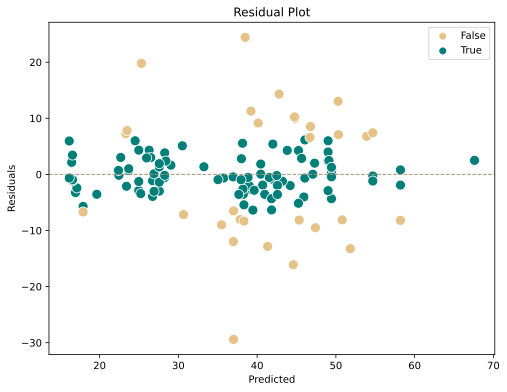

In [93]:
# Calculate residuals
residuals = y_test - y_pred

# Calculate standard deviation of residuals
sigma = np.std(residuals)

# Create a list for hue parameter
hue = list(map(lambda x: abs(x) < sigma, residuals))

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, hue=hue, palette = ['#E5C287', '#007F79'], s=100)
plt.axhline(y=0, color='#A79277', linestyle='--', lw=1)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# <a id='ten'></a> Dash APP Visualizing

#### Loading Models and Encoders
- **LabelEncoder:** Utilized for encoding categorical variables.
- **PolynomialFeatures Encoder:** Used for creating interaction features.

#### Models
- **KMeans Model:** Employed for clustering latitude and longitude coordinates.
- **Cluster Model:** Utilized for predicting cluster density.
- **Best Model:** Employed for real estate price prediction.

#### Preprocessing
- **Scaler:** Utilized for feature scaling.

#### Dash App
- **Layout:** 
  - Consists of input fields for distance to metro, number of convenience stores, latitude, and longitude.
  - Prediction button to compute house price prediction.
- **Callback Functionality:**
  - Upon button click, predicts the house price based on input features.
  - Checks for input completeness before prediction.



In [97]:
# loading LabelEncoder
label_encoder = joblib.load('/kaggle/working/label_encoder.pkl')

# loading PolinomialFeatures encoder
poly = joblib.load('/kaggle/working/poly.pkl')

# loading models
kmeans = joblib.load('/kaggle/working/kmeans_model.pkl')
cluster_model = joblib.load('/kaggle/working/cluster_model.pkl')
best_model = joblib.load('/kaggle/working/best_model.pkl')

# Load the scaler
scaler = joblib.load('/kaggle/working/scaler.pkl')

In [98]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Real Estate Price Prediction", style={'text-align': 'center', 'font-family': 'Avenir Light, sans-serif', 'color': '#45474B'}),
        
        html.Div([
            dcc.Input(id='distance_to_mrt', type='number', placeholder='Distance to Metro',
                      style={'margin': '10px', 'padding': '10px', 'background-image': 'linear-gradient(to right, #EAECCC, #DED0B6)', 'border-radius': '10px'}),
            dcc.Input(id='num_convenience_stores', type='number', placeholder='Number of Stores',
                      style={'margin': '10px', 'padding': '10px', 'background-image': 'linear-gradient(to right, #EAECCC, #DED0B6)', 'border-radius': '10px'}),
            dcc.Input(id='latitude', type='number', placeholder='Latitude',
                      style={'margin': '10px', 'padding': '10px', 'background-image': 'linear-gradient(to right, #EAECCC, #DED0B6)', 'border-radius': '10px'}),
            dcc.Input(id='longitude', type='number', placeholder='Longitude',
                      style={'margin': '10px', 'padding': '10px', 'background-image': 'linear-gradient(to right, #EAECCC, #DED0B6)', 'border-radius': '10px'}),
            html.Button('Predict Price', id='predict_button', n_clicks=0,
                        style={'margin': '10px', 'padding': '10px', 'background-image': 'linear-gradient(to right, #7ED7C1, #2D9596)', 'width': '200px', 'height': '50px', 'color': 'white',
                                'border-radius': '30px', 'font-size': '20px'})

        ], style={'text-align': 'center', 'font-family': 'Avenir Light, sans-serif', 'font-size': '16px'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'})
    ], style={'position': 'absolute', 'left': '50%', 'top': '50%', 'transform': 'translate(-50%, -50%)', 'width': '50%', 'margin': '0 auto', 'border': '2px solid #007f79',
               'padding': '20px', 'border-radius': '10px', 'font-family': 'Avenir Light, sans-serif',
               'background-image': 'linear-gradient(to right, #5F8670, #C3E2C2)'})
], style={'background-image': 'linear-gradient(to right, #FFFBF5, #ECE3CE)', 'height': '630px', 'border-radius': '30px'})

# Define callback to update output
@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [State('distance_to_mrt', 'value'), 
     State('num_convenience_stores', 'value'),
     State('latitude', 'value'),
     State('longitude', 'value')]
)
def update_output(n_clicks, distance_to_mrt, num_convenience_stores, latitude, longitude):
    if n_clicks > 0 and all(v is not None for v in [distance_to_mrt, num_convenience_stores, latitude, longitude]):
        # Prepare the feature vector
        features = pd.DataFrame([[distance_to_mrt, num_convenience_stores, latitude, longitude]], 
                                columns=['x3_distance_to_the_nearest_mrt_station', 'x4_number_of_convenience_stores', 'latitude', 'longitude'])
        
        # Predict cluster
        cluster = kmeans.predict(features[['latitude', 'longitude']])[0]

        # Encode cluster label
        cluster_encoded = label_encoder.transform([cluster])[0]

        # Use the encoded cluster label as a feature
        features['cluster'] = cluster_encoded
        
        # Apply store density features
        features['x3_distance_to_the_nearest_mrt_station_density'] = cluster_model.predict(features[['cluster', 'x3_distance_to_the_nearest_mrt_station']])[0]
        
        # Dropping excessinve features
        features = features.drop(columns=['latitude', 'longitude'])

        # Reorder the df
        features.columns = ['x3_distance_to_the_nearest_mrt_station', 'x4_number_of_convenience_stores', 'cluster', 'x3_distance_to_the_nearest_mrt_station_density']
        
        # Applying pretrained StandartScaler
        scaled_features = scaler.transform(features)

        # Applying pretrained PolynomialFeatures model
        poly_scaled_features = poly.transform(scaled_features)
        
        # Predict
        prediction = best_model.predict(poly_scaled_features)[0]
        return f'Predicted House Price of Unit Area: {prediction:.2f}'
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [99]:
!pip freeze > requirements.txt

In [100]:
!python3 --version

Python 3.10.13


In [101]:
!which python3

/opt/conda/bin/python3
